# A Comprehensive Cleaning and Exploratory Data Analysis

## Kaggle Dataset

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


kaggle = pd.read_csv("../raw_data/kaggle_dataset.csv")

print("Dataset shape:", kaggle.shape)
kaggle.head()

Dataset shape: (100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [61]:
print("\nMissing values per column:")
print(kaggle.isnull().sum())

duplicates = kaggle.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

kaggle = kaggle.drop_duplicates()
print(f"After removing duplicates, shape: {kaggle.shape}")

kaggle.to_csv("../clean_data/kaggle_dataset_clean.csv", index=False)


Missing values per column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Number of duplicate rows: 3854
After removing duplicates, shape: (96146, 9)


In [62]:
print("\nBasic statistics:")
print(kaggle.describe())

print("\nData types:")
print(kaggle.dtypes)


Basic statistics:
                age  hypertension  heart_disease           bmi   HbA1c_level  \
count  96146.000000  96146.000000   96146.000000  96146.000000  96146.000000   
mean      41.794326      0.077601       0.040803     27.321461      5.532609   
std       22.462948      0.267544       0.197833      6.767716      1.073232   
min        0.080000      0.000000       0.000000     10.010000      3.500000   
25%       24.000000      0.000000       0.000000     23.400000      4.800000   
50%       43.000000      0.000000       0.000000     27.320000      5.800000   
75%       59.000000      0.000000       0.000000     29.860000      6.200000   
max       80.000000      1.000000       1.000000     95.690000      9.000000   

       blood_glucose_level      diabetes  
count         96146.000000  96146.000000  
mean            138.218231      0.088220  
std              40.909771      0.283616  
min              80.000000      0.000000  
25%             100.000000      0.000000  
50

In [63]:
cat_cols = kaggle.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
for col in cat_cols:
    print(f"\n{col} value counts:")
    print(kaggle[col].value_counts())

num_cols = kaggle.select_dtypes(include=['int64', 'float64']).columns
print("\nDistribution of numerical columns:")
for col in num_cols:
    print(f"\n{col} - Mean: {kaggle[col].mean()}, Median: {kaggle[col].median()}, Min: {kaggle[col].min()}, Max: {kaggle[col].max()}")



Categorical columns:

gender value counts:
gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

smoking_history value counts:
smoking_history
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: count, dtype: int64

Distribution of numerical columns:

age - Mean: 41.79432571297817, Median: 43.0, Min: 0.08, Max: 80.0

hypertension - Mean: 0.07760073221974913, Median: 0.0, Min: 0, Max: 1

heart_disease - Mean: 0.04080252948640609, Median: 0.0, Min: 0, Max: 1

bmi - Mean: 27.32146111122668, Median: 27.32, Min: 10.01, Max: 95.69

HbA1c_level - Mean: 5.532608740873255, Median: 5.8, Min: 3.5, Max: 9.0

blood_glucose_level - Mean: 138.21823060761758, Median: 140.0, Min: 80, Max: 300

diabetes - Mean: 0.08821999875189815, Median: 0.0, Min: 0, Max: 1


Text(0.5, 1.0, 'Distribution of Diabetes')

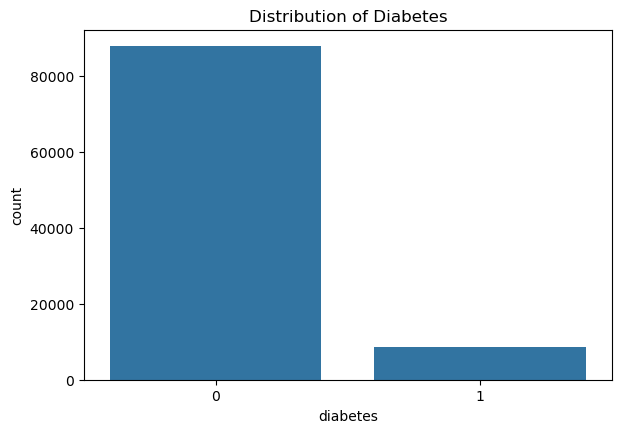

In [64]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='diabetes', data=kaggle)
plt.title('Distribution of Diabetes')

## CDC Dataset

In [65]:
cdc = pd.read_csv("../raw_data/cdc_dataset.csv")

print("Dataset shape:", cdc.shape)
cdc.head()

Dataset shape: (253680, 22)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


In [66]:
print("\nMissing values per column:")
print(cdc.isnull().sum())

duplicates = cdc.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

cdc = cdc.drop_duplicates()
print(f"After removing duplicates, shape: {cdc.shape}")

cdc.to_csv("../clean_data/cdc_dataset_clean.csv", index=False)


Missing values per column:
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

Number of duplicate rows: 24206
After removing duplicates, shape: (229474, 22)


In [67]:
print("\nBasic statistics:")
print(cdc.describe())

print("\nData types:")
print(cdc.dtypes)


Basic statistics:
              HighBP       HighChol      CholCheck            BMI  \
count  229474.000000  229474.000000  229474.000000  229474.000000   
mean        0.454343       0.441640       0.959481      28.687507   
std         0.497912       0.496584       0.197173       6.789204   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      32.000000   
max         1.000000       1.000000       1.000000      98.000000   

             Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  229474.00000  229474.000000         229474.000000  229474.000000   
mean        0.46580       0.044816              0.103336       0.733042   
std         0.49883       0.206899              0.304398       0.442371   
min         0.00000       0.000000              0.000000   

In [68]:
cat_cols = cdc.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
for col in cat_cols:
    print(f"\n{col} value counts:")
    print(cdc[col].value_counts())

num_cols = cdc.select_dtypes(include=['int64', 'float64']).columns
print("\nDistribution of numerical columns:")
for col in num_cols:
    print(f"\n{col} - Mean: {cdc[col].mean()}, Median: {cdc[col].median()}, Min: {cdc[col].min()}, Max: {cdc[col].max()}")



Categorical columns:

Distribution of numerical columns:

HighBP - Mean: 0.45434341145402096, Median: 0.0, Min: 0, Max: 1

HighChol - Mean: 0.44164044728378815, Median: 0.0, Min: 0, Max: 1

CholCheck - Mean: 0.9594812484203004, Median: 1.0, Min: 0, Max: 1

BMI - Mean: 28.687507081412274, Median: 27.0, Min: 12, Max: 98

Smoker - Mean: 0.4658000470641554, Median: 0.0, Min: 0, Max: 1

Stroke - Mean: 0.04481553465752111, Median: 0.0, Min: 0, Max: 1

HeartDiseaseorAttack - Mean: 0.10333632568395548, Median: 0.0, Min: 0, Max: 1

PhysActivity - Mean: 0.7330416517775434, Median: 1.0, Min: 0, Max: 1

Fruits - Mean: 0.6126750743003565, Median: 1.0, Min: 0, Max: 1

Veggies - Mean: 0.7945867505686919, Median: 1.0, Min: 0, Max: 1

HvyAlcoholConsump - Mean: 0.06079120074605402, Median: 0.0, Min: 0, Max: 1

AnyHealthcare - Mean: 0.9460113128284686, Median: 1.0, Min: 0, Max: 1

NoDocbcCost - Mean: 0.09292120240201504, Median: 0.0, Min: 0, Max: 1

GenHlth - Mean: 2.6018198140094304, Median: 3.0, Min: 

Text(0.5, 1.0, 'Distribution of Diabetes')

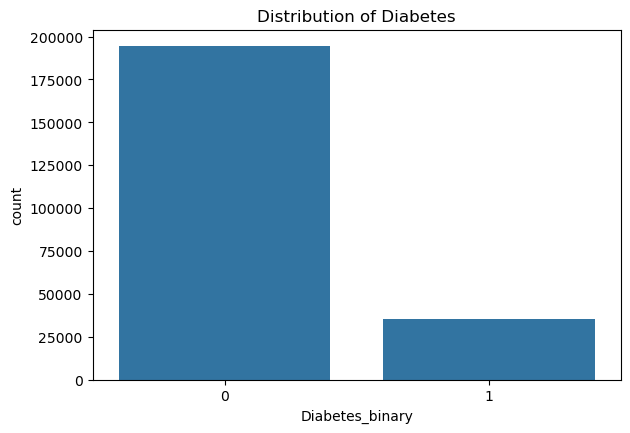

In [69]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='Diabetes_binary', data=cdc)
plt.title('Distribution of Diabetes')

## Hospital Dataset

In [70]:
hospital = pd.read_csv("../raw_data/hospital_dataset.csv")

print("Dataset shape:", hospital.shape)
hospital.head()

Dataset shape: (101766, 48)


C:\Users\Eric\AppData\Local\Temp\ipykernel_31356\3398363347.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  hospital = pd.read_csv("../raw_data/hospital_dataset.csv")


,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [71]:
print("\nMissing values per column:")
print(hospital.isnull().sum())

duplicates = hospital.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

hospital = hospital.drop_duplicates()
print(f"After removing duplicates, shape: {hospital.shape}")

hospital.to_csv("../clean_data/hospital_dataset_clean.csv", index=False)


Missing values per column:
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide           

In [72]:
print("\nBasic statistics:")
print(hospital.describe())

print("\nData types:")
print(hospital.dtypes)


Basic statistics:
       admission_type_id  discharge_disposition_id  admission_source_id  \
count      101766.000000             101766.000000        101766.000000   
mean            2.024006                  3.715642             5.754437   
std             1.445403                  5.280166             4.064081   
min             1.000000                  1.000000             1.000000   
25%             1.000000                  1.000000             1.000000   
50%             1.000000                  1.000000             7.000000   
75%             3.000000                  4.000000             7.000000   
max             8.000000                 28.000000            25.000000   

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count     101766.000000       101766.000000   101766.000000    101766.000000   
mean           4.395987           43.095641        1.339730        16.021844   
std            2.985108           19.674362        1.705807      

In [73]:
cat_cols = hospital.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
for col in cat_cols:
    print(f"\n{col} value counts:")
    print(hospital[col].value_counts())

num_cols = hospital.select_dtypes(include=['int64', 'float64']).columns
print("\nDistribution of numerical columns:")
for col in num_cols:
    print(f"\n{col} - Mean: {hospital[col].mean()}, Median: {hospital[col].median()}, Min: {hospital[col].min()}, Max: {hospital[col].max()}")



Categorical columns:

race value counts:
race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

gender value counts:
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

age value counts:
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

weight value counts:
weight
[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: count, dtype: int64

payer_code value counts:
payer_code
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       

Text(0.5, 1.0, 'Distribution of Diabetes')

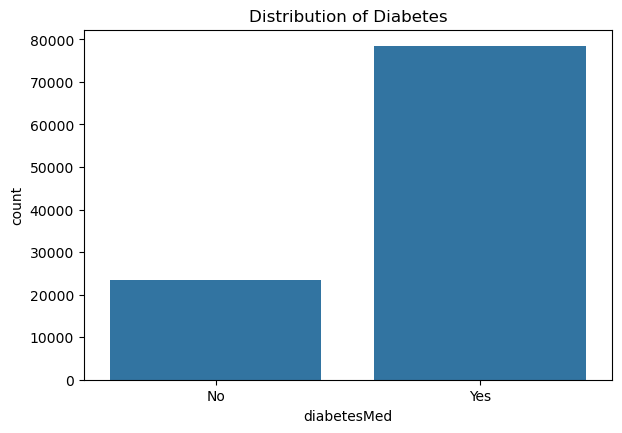

In [74]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.countplot(x='diabetesMed', data=hospital)
plt.title('Distribution of Diabetes')